[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/gmihaila/machine_learning_toolbox/blob/master/cat_boost.ipynb)

### CatBoost is a machine learning method based on gradient boosting over decision trees.

#### Main advantages of CatBoost:

* **Superior quality when compared with other GBDT libraries.**
* **Best in class inference speed.**
* **Support for both numerical and categorical features.**
* **Fast GPU and multi-GPU support for training (compiled binaries and python package for learning on one host, build cmd-line MPI version from source to learn on several GPU machines).**
* **Data visualization tools included.**


### [Tutorial](https://medium.com/bigdatarepublic/feature-importance-whats-in-a-name-79532e59eea3)
 
### [Guide](https://github.com/catboost/catboost/blob/master/catboost/tutorials/catboost_python_tutorial.ipynb)

In [1]:
# INSTALLS

from IPython.display import clear_output

# Install pydot
print("Installing graphiz and pydot")
!apt-get -qq install -y graphviz && pip install -q pydot
clear_output()

#Install non-standard packages (assuming jupyter notebook)
print("Installing shap")
!pip install shap
clear_output()

print("Installing lime")
!pip install lime
clear_output()

#eli5 package (https://eli5.readthedocs.io/en/latest)
print("Installing eli5")
!pip install eli5
clear_output()

print("Installing catboost")
!pip install catboost
clear_output()

print("Installing ipywidgets")
!pip install ipywidgets
clear_output()

print("Downloading pima-indians-diabetes")
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
clear_output()

!ls

model.png			  pima-indians-diabetes.data.csv.2
pima-indians-diabetes.data.csv	  pima-indians-diabetes.data.csv.3
pima-indians-diabetes.data.csv.1  sample_data


In [2]:
import numpy as np
import pandas as pd

from catboost import CatBoostClassifier, Pool, cv

#scikit-learn package (https://pypi.org/project/scikit-learn)
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split #TAKES NUMPY OR DATA FRAME!!
from sklearn.metrics.scorer import make_scorer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt

import eli5
from eli5.sklearn import PermutationImportance

import itertools


#eli5 package (https://eli5.readthedocs.io/en/latest)
import eli5
from eli5.sklearn import PermutationImportance

#lime package (https://github.com/marcotcr/lime)
import lime
import lime.lime_tabular

#shap package (https://github.com/slundberg/shap)
import shap

#Split train and test set.
RANDOM_STATE = 123

# Parse data
path_file = 'pima-indians-diabetes.data.csv'

df = pd.read_csv(path_file, header=None)

x_df = df.drop(df.columns[8],axis=1)
y_df = df[df.columns[8]]

df.head()



# Parse data
# path_file = 'BayesianNetworkGenerator_breast-cancer_small.csv'

# df = pd.read_csv(path_file, header=None)

# x_df = df.drop(df.columns[9],axis=1)
# y_df = df[df.columns[9]]


# df.head()


# X, X_test, y, y_test = train_test_split(x_df, y_df, train_size=0.90, random_state=42)
# X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=RANDOM_STATE)


# print("Train: ", X_train.shape[0])
# print("Validation: ",X_validation.shape[0])
# print("Test: ",X_test.shape[0])


# x_tr = pd.get_dummies(X_train)
# y_tr = [1 if a == 'no-recurrence-events' else 0 for a in y_train]

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
categorical_features_indices = np.where(x_df.dtypes != np.float)[0];
categorical_features_indices

array([0, 1, 2, 3, 4, 7])

In [4]:
X, X_test, y, y_test = train_test_split(x_df, y_df, train_size=0.85, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.85, random_state=RANDOM_STATE)


print("Train: ", X_train.shape[0])
print("Validation: ",X_validation.shape[0])
print("Test: ",X_test.shape[0])

('Train: ', 554)
('Validation: ', 98)
('Test: ', 116)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
# CatBoost

model = None
del model


model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

# https://tech.yandex.com/catboost/doc/dg/concepts/python-reference_catboostregressor_fit-docpage/

model.fit(X, y,
          cat_features=categorical_features_indices,
          eval_set=(X_validation, y_validation),
          logging_level='Verbose',  # you can uncomment this for text output)
          plot=True)

0:	learn: 0.6669030	test: 0.6569778	best: 0.6569778 (0)	total: 66.7ms	remaining: 1m 6s
1:	learn: 0.6460869	test: 0.6290375	best: 0.6290375 (1)	total: 97.3ms	remaining: 48.5s
2:	learn: 0.6373583	test: 0.6175961	best: 0.6175961 (2)	total: 128ms	remaining: 42.6s
3:	learn: 0.6210798	test: 0.5942728	best: 0.5942728 (3)	total: 156ms	remaining: 38.7s
4:	learn: 0.6028715	test: 0.5711197	best: 0.5711197 (4)	total: 185ms	remaining: 36.8s
5:	learn: 0.5954558	test: 0.5590818	best: 0.5590818 (5)	total: 204ms	remaining: 33.8s
6:	learn: 0.5871272	test: 0.5463283	best: 0.5463283 (6)	total: 231ms	remaining: 32.8s
7:	learn: 0.5781605	test: 0.5364003	best: 0.5364003 (7)	total: 260ms	remaining: 32.2s
8:	learn: 0.5698426	test: 0.5277977	best: 0.5277977 (8)	total: 290ms	remaining: 31.9s
9:	learn: 0.5575244	test: 0.5126947	best: 0.5126947 (9)	total: 313ms	remaining: 31s
10:	learn: 0.5486212	test: 0.5036126	best: 0.5036126 (10)	total: 338ms	remaining: 30.4s
11:	learn: 0.5467322	test: 0.4986108	best: 0.4986108

In [6]:
# Model Evaluation using Cross validation

cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X, y, cat_features=categorical_features_indices),
    cv_params,
    logging_level='Verbose', 
    plot=True
)

print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

MetricVisualizer(layout=Layout(align_self=u'stretch', height=u'500px'))

0:	learn: 0.6892640	test: 0.6893800	best: 0.6893800 (0)	total: 170ms	remaining: 2m 50s
1:	learn: 0.6854203	test: 0.6860918	best: 0.6860918 (1)	total: 408ms	remaining: 3m 23s
2:	learn: 0.6809741	test: 0.6822461	best: 0.6822461 (2)	total: 490ms	remaining: 2m 42s
3:	learn: 0.6767956	test: 0.6786290	best: 0.6786290 (3)	total: 581ms	remaining: 2m 24s
4:	learn: 0.6732118	test: 0.6755873	best: 0.6755873 (4)	total: 658ms	remaining: 2m 10s
5:	learn: 0.6697107	test: 0.6724191	best: 0.6724191 (5)	total: 752ms	remaining: 2m 4s
6:	learn: 0.6664487	test: 0.6698255	best: 0.6698255 (6)	total: 845ms	remaining: 1m 59s
7:	learn: 0.6626169	test: 0.6667521	best: 0.6667521 (7)	total: 947ms	remaining: 1m 57s
8:	learn: 0.6589828	test: 0.6633990	best: 0.6633990 (8)	total: 1.02s	remaining: 1m 52s
9:	learn: 0.6559493	test: 0.6606355	best: 0.6606355 (9)	total: 1.08s	remaining: 1m 47s
10:	learn: 0.6528127	test: 0.6582658	best: 0.6582658 (10)	total: 1.18s	remaining: 1m 45s
11:	learn: 0.6494884	test: 0.6553676	best:

/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [0]:
# Get predictions
y_predict = model.predict(X_test)

# Probability of malignant tissue produced by the model
y_prob = [probs[1] for probs in model.predict_proba(X_test)]

In [8]:
#Accuracy on test set
print("Test accuracy: %s"%(accuracy_score(y_test, y_predict).round(2)))

# Confusion matrix test set
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted NO', 'Predicted YES'],
    index=['Actual NO', 'Actual YES']
)

Test accuracy: 0.7


,Predicted NO,Predicted YES
Actual NO,52,24
Actual YES,11,29


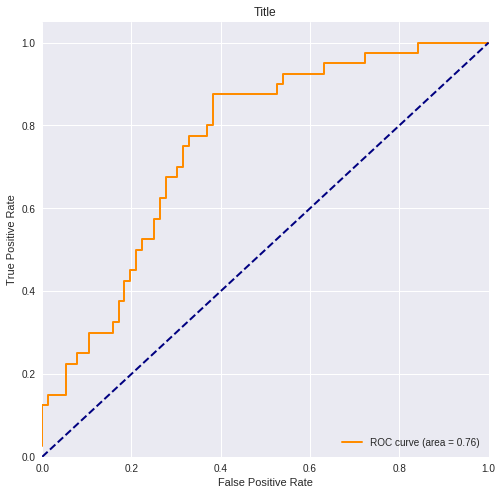

In [9]:
# Compute area under the curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

#Set default figure size
plt.rcParams['figure.figsize'] = (8,8)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Title")
plt.legend(loc="lower right")
plt.show()

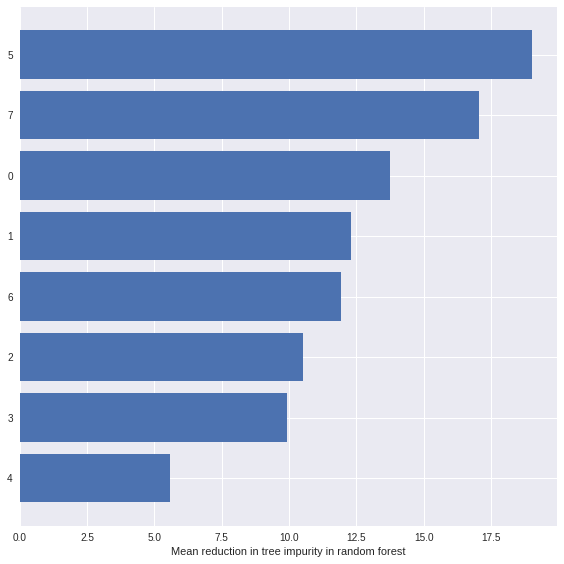

In [10]:
# Feature importance dataframe
imp_df = pd.DataFrame({'feature': X_train.columns.values,
                       'importance': model.feature_importances_})
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='importance')
imp_range=range(1,len(imp_df.index)+1)
 
## Barplot with confidence intervals
height = ordered_df['importance']
bars = ordered_df['feature']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Mean reduction in tree impurity in random forest")

plt.tight_layout()
# Show graphic
plt.show()


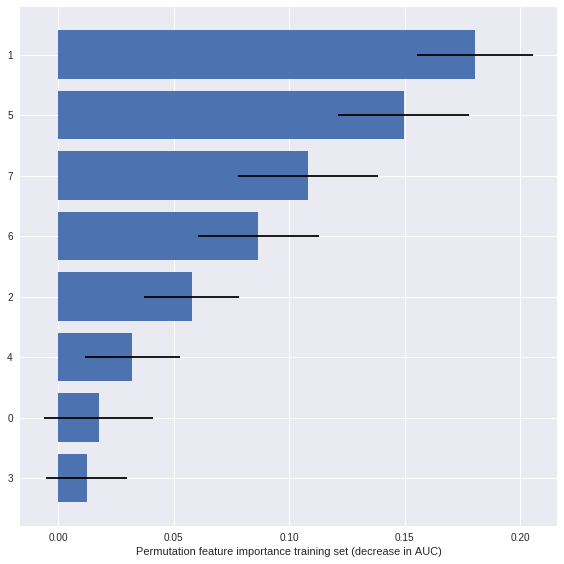

In [11]:
# Feature importance based on TRAINING set

perm_test = PermutationImportance(model, scoring=make_scorer(roc_auc_score),
                                   n_iter=50, random_state=RANDOM_STATE, cv="prefit")

# fit and see the permuation importances
perm_test.fit(X_train, y_train)

imp_df = eli5.explain_weights_df(perm_test)
label_df = pd.DataFrame({'feature': [ "x" + str(i) for i in range(len(X_test.columns))], 'feature_name': X_test.columns.values})
imp_df = pd.merge(label_df, imp_df, on='feature', how='inner', validate="one_to_one")
 
# Reorder by importance
ordered_df = imp_df.sort_values(by='weight')
imp_range=range(1,len(imp_df.index)+1)
 

## Barplot with confidence intervals

height = ordered_df['weight']
bars = ordered_df['feature_name']
ci = 1.96 * ordered_df['std']
y_pos = np.arange(len(bars))

# Create horizontal bars
plt.barh(y_pos, height, xerr=ci)
 
# Create names on the y-axis
plt.yticks(y_pos, bars)

plt.xlabel("Permutation feature importance training set (decrease in AUC)")
plt.tight_layout()

# Show graphic
plt.show()
